<a href="https://colab.research.google.com/github/ParkEunhee999/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep=',', header=0,
                 index_col=None, skiprows=None, nrows=None)

print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)

## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records', encoding='utf-8', )

print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


In [1]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,867 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [5]:
import json
import pandas as pd

## energyinfo.json 파일 출력
with open('energyinfo.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)

## 데이터 변환
result = []
for item in data:
    for date_key, values in item.items():
        new_item = values.copy()
        new_item['date'] = date_key
        result.append(new_item)
print(result)

## json.dump를 이용한 저장
with open('output.json', mode='w', encoding='utf-8') as f:
    json.dump(result, f, indent=4, ensure_ascii=False)

df = pd.DataFrame(result)
print(df)

[{'201501': {'heat': 532, 'waterHot': 132, 'gas': 5, 'elect': 674, 'waterCool': 176}}, {'201502': {'heat': 435, 'waterHot': 126, 'gas': 5, 'elect': 639, 'waterCool': 174}}, {'201503': {'heat': 329, 'waterHot': 123, 'gas': 4, 'elect': 532, 'waterCool': 173}}, {'201504': {'heat': 157, 'waterHot': 106, 'gas': 3, 'elect': 554, 'waterCool': 180}}, {'201505': {'heat': 51, 'waterHot': 88, 'gas': 2, 'elect': 506, 'waterCool': 184}}, {'201506': {'heat': 29, 'waterHot': 63, 'gas': 2, 'elect': 539, 'waterCool': 198}}, {'201507': {'heat': 25, 'waterHot': 50, 'gas': 2, 'elect': 565, 'waterCool': 200}}, {'201508': {'heat': 24, 'waterHot': 40, 'gas': 2, 'elect': 751, 'waterCool': 207}}, {'201509': {'heat': 28, 'waterHot': 52, 'gas': 2, 'elect': 531, 'waterCool': 200}}, {'201510': {'heat': 78, 'waterHot': 76, 'gas': 2, 'elect': 493, 'waterCool': 192}}, {'201511': {'heat': 236, 'waterHot': 94, 'gas': 2, 'elect': 560, 'waterCool': 187}}, {'201512': {'heat': 425, 'waterHot': 118, 'gas': 3, 'elect': 596, 

In [9]:
## date 컬럼에서 year와 month 추출
df['year'] = df['date'].str[:4]
df['month'] = df['date'].str[4:].astype(int)

## season 컬럼 추가
def season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'
df['season'] = df['month'].apply(season)

df = df[['date', 'year', 'season', 'heat', 'waterHot', 'gas', 'elect', 'waterCool']]
print(df)

       date  year season  heat  waterHot  gas  elect  waterCool
0    201501  2015     겨울   532       132    5    674        176
1    201502  2015     겨울   435       126    5    639        174
2    201503  2015      봄   329       123    4    532        173
3    201504  2015      봄   157       106    3    554        180
4    201505  2015      봄    51        88    2    506        184
..      ...   ...    ...   ...       ...  ...    ...        ...
115  202408  2024     여름    28        51    1   1292        258
116  202409  2024     가을    28        53    1   1081        253
117  202410  2024     가을    64        91    1    696        246
118  202411  2024     가을   210       118    2    646        243
119  202412  2024     겨울   514       155    3    711        241

[120 rows x 8 columns]


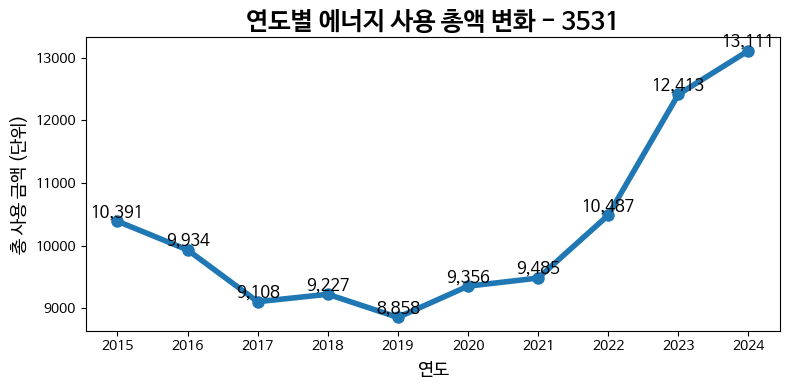

In [21]:
import matplotlib.pyplot as plt

## 에너지 사용 총액 계산 (전기 + 가스 + 난방 + 급탕)
df['total'] = df['elect'] + df['gas'] + df['heat'] + df['waterHot']
## 연도별로 총액 합계 계산
year_total = df.groupby('year')['total'].sum()
## 선그래프 설정
plt.figure(figsize=(8, 4))
plt.title('연도별 에너지 사용 총액 변화 - 3531', fontsize=18, fontweight='bold')
plt.plot(year_total.index, year_total.values, marker='o', linewidth=4, markersize=8)
plt.xlabel('연도', fontsize=13)
plt.ylabel('총 사용 금액 (단위)', fontsize=13)
for x, y in zip(year_total.index, year_total.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=12)

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

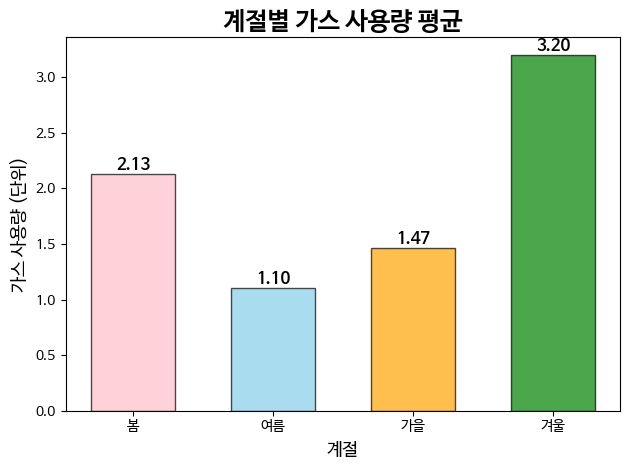

In [22]:
## 계절별 가스 사용량 평균 계산
season_gas_average = df.groupby('season')['gas'].mean()
## 계절 순서 설정
season_order = ['봄', '여름', '가을', '겨울']
season_gas_average = season_gas_average.reindex(season_order)
## 막대 그래프 설정
bars = plt.bar(season_gas_average.index, season_gas_average.values,
               color=['pink', 'skyblue', 'orange', 'green'],
               edgecolor='black', alpha=0.7, width=0.6)
plt.title('계절별 가스 사용량 평균', fontsize=18, fontweight='bold')
plt.xlabel('계절', fontsize=13)
plt.ylabel('가스 사용량 (단위)', fontsize=13)

## 각 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

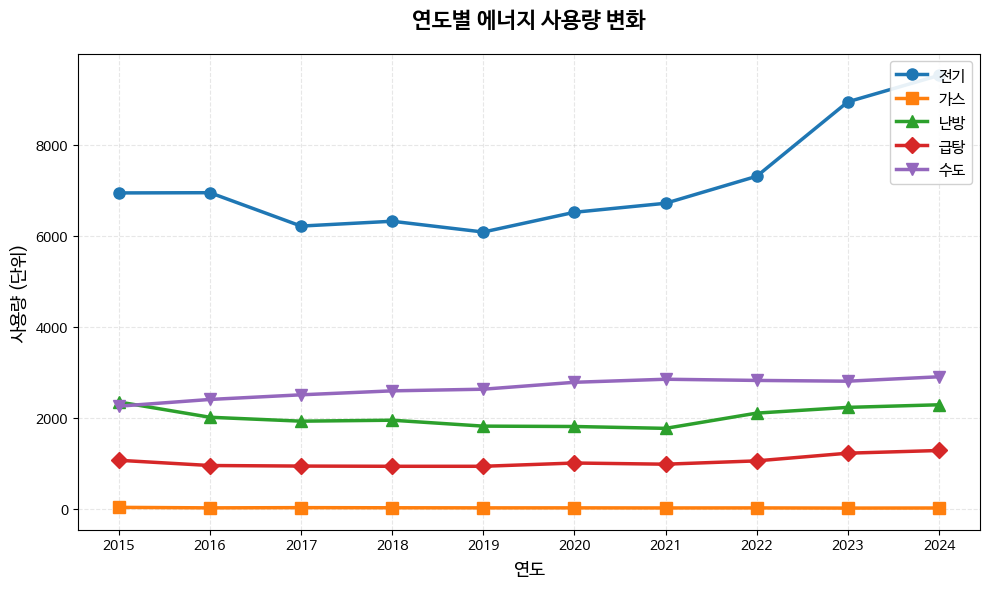


=== 연도별 에너지 사용량 ===
      elect  gas  heat  waterHot  waterCool
year                                       
2015   6940   34  2349      1068       2256
2016   6945   23  2013       953       2404
2017   6212   28  1927       941       2506
2018   6318   25  1948       936       2593
2019   6081   23  1818       936       2629
2020   6515   23  1810      1008       2781
2021   6713   21  1769       982       2848
2022   7306   22  2104      1055       2822
2023   8941   18  2230      1224       2805
2024   9521   20  2287      1283       2902


In [26]:
import matplotlib.pyplot as plt


# date 컬럼에서 year 추출
df['year'] = df['date'].str[:4]

# 연도별 각 에너지 사용량 합계 계산
yearly_energy = df.groupby('year')[['elect', 'gas', 'heat', 'waterHot', 'waterCool']].sum()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 각 에너지원별로 선 그래프 그리기
# marker : 데이터 포인트 마커 모양
# linewidth : 선 두께
# markersize : 마커 크기
# label : 범례에 표시될 이름
plt.plot(yearly_energy.index, yearly_energy['elect'],
         marker='o', linewidth=2.5, markersize=8, label='전기')

plt.plot(yearly_energy.index, yearly_energy['gas'],
         marker='s', linewidth=2.5, markersize=8, label='가스')

plt.plot(yearly_energy.index, yearly_energy['heat'],
         marker='^', linewidth=2.5, markersize=8, label='난방')

plt.plot(yearly_energy.index, yearly_energy['waterHot'],
         marker='D', linewidth=2.5, markersize=8, label='급탕')

plt.plot(yearly_energy.index, yearly_energy['waterCool'],
         marker='v', linewidth=2.5, markersize=8, label='수도')

# 그래프 제목 설정
plt.title('연도별 에너지 사용량 변화', fontsize=16, fontweight='bold', pad=20)

# x축, y축 레이블 설정
plt.xlabel('연도', fontsize=13)
plt.ylabel('사용량 (단위)', fontsize=13)

# 범례 표시 (위치: 오른쪽 위)
# loc : 위치 지정
# fontsize : 글자 크기
# framealpha : 배경 투명도
plt.legend(loc='upper right', fontsize=11, framealpha=0.9)

# 그리드 추가
plt.grid(True, alpha=0.3, linestyle='--')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

# 연도별 에너지 사용량 데이터 출력
print("\n=== 연도별 에너지 사용량 ===")
print(yearly_energy)

/tmp/ipython-input-729733891.py:65: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-729733891.py:65: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-729733891.py:65: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-729733891.py:65: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-729733891.py:65: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-729733891.py:65: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-729733891.py:65: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/i

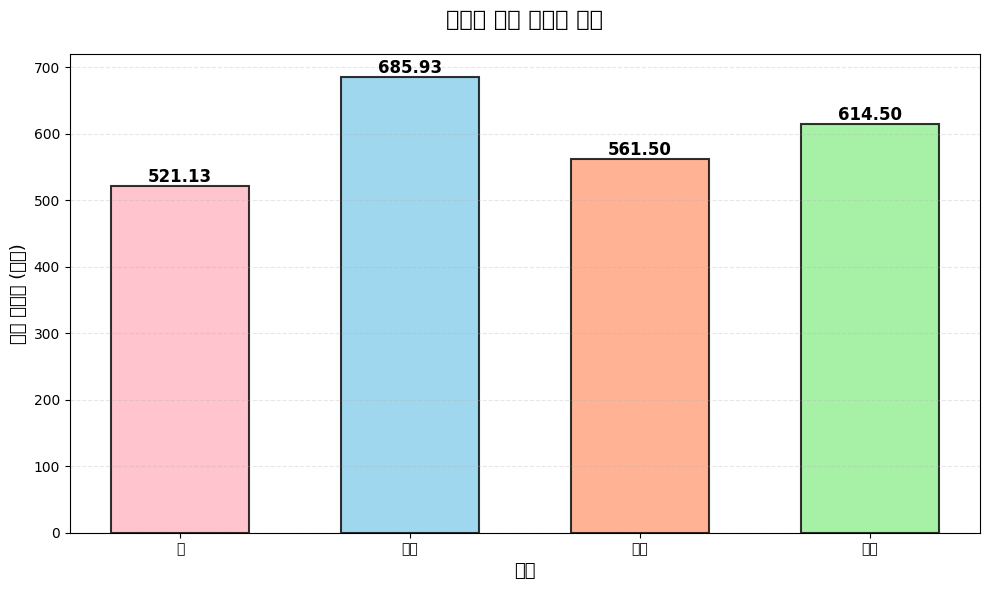


=== 계절별 전기 사용량 평균 ===
season
봄     521.133333
여름    685.933333
가을    561.500000
겨울    614.500000
Name: elect, dtype: float64


In [27]:
# date 컬럼에서 year와 month 추출
df['year'] = df['date'].str[:4]
df['month'] = df['date'].str[4:].astype(int)

# 계절 컬럼 추가
def get_season(month):
    if 3 <= month <= 5:        # 3월, 4월, 5월
        return '봄'
    elif 6 <= month <= 8:      # 6월, 7월, 8월
        return '여름'
    elif 9 <= month <= 11:     # 9월, 10월, 11월
        return '가을'
    else:                      # 12월, 1월, 2월
        return '겨울'

df['season'] = df['month'].apply(get_season)

# 계절별 전기 사용량 평균 계산
season_elect_avg = df.groupby('season')['elect'].mean()

# 계절 순서 지정 (봄, 여름, 가을, 겨울 순서로)
season_order = ['봄', '여름', '가을', '겨울']
season_elect_avg = season_elect_avg.reindex(season_order)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
# color : 각 계절별로 다른 색상 지정
# edgecolor : 막대 테두리 색상
# linewidth : 테두리 두께
# alpha : 투명도 (0~1)
bars = plt.bar(season_elect_avg.index, season_elect_avg.values,
               color=['#FFB6C1', '#87CEEB', '#FFA07A', '#90EE90'],
               edgecolor='black', linewidth=1.5, alpha=0.8, width=0.6)

# 그래프 제목 설정
plt.title('계절별 전기 사용량 평균', fontsize=16, fontweight='bold', pad=20)

# x축, y축 레이블 설정
plt.xlabel('계절', fontsize=13)
plt.ylabel('전기 사용량 (단위)', fontsize=13)

# 그리드 추가 (y축만, 가로선만)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

# 각 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()  # 막대의 높이(값) 가져오기
    # 막대 중앙 상단에 텍스트 배치
    plt.text(bar.get_x() + bar.get_width()/2.,  # x 좌표: 막대 중앙
             height,                              # y 좌표: 막대 높이
             f'{height:.2f}',                     # 표시할 텍스트: 소수점 둘째 자리까지
             ha='center',                         # 수평 정렬: 가운데
             va='bottom',                         # 수직 정렬: 아래
             fontsize=12,                         # 글자 크기
             fontweight='bold')                   # 글자 굵기

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

# 계절별 전기 평균 데이터 출력
print("\n=== 계절별 전기 사용량 평균 ===")
print(season_elect_avg)

## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.019788742065429688, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-16T13:30', 'interval': 900, 'temperature_2m': 23.7}}
서울시 종로구의 현재 온도는 : 23.7°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0  19.7M      0  0:00:05  0:00:05 --:--:-- 24.1M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
google-chrome-stable is already the newest version (140.0.7339.127-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://github.com/jaehwachung/Data-Analysis-with-Open-Source'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)

## 드라이버 종료
driver.quit()

['GitHub - jaehwachung/Data-Analysis-with-Open-Source: Data Analysis with Open Source']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = ''

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params=params)

## 호출 성공/실패 출력
print(response.json())


{'response': {'body': {'totalCount': 40, 'items': [{'so2Grade': '1', 'coFlag': None, 'khaiValue': '39', 'so2Value': '0.002', 'coValue': '0.4', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '11', 'khaiGrade': '1', 'pm25Value': '8', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-16 23:00', 'coGrade': '1', 'no2Value': '0.024', 'stationName': '중구', 'pm10Grade': '1', 'o3Value': '0.022'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '39', 'so2Value': '0.003', 'coValue': '0.5', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '9', 'khaiGrade': '1', 'pm25Value': '8', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-16 23:00', 'coGrade': '1', 'no2Value': '0.023', 'stationName': '한강대로', 'pm10Grade': '1', 'o3Value': '0.016'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '42', 'so2Value': '0.003', 'coValue': '